In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**Normal Approach by splitting the data into train, validation and test set**

In [20]:
import cv2
import matplotlib.pyplot as plt 
import os ,shutil 
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize
from random import shuffle

**Importing the dataset to the directory**

In [ ]:
orginal_data_dir = '/content/drive/My Drive/natural_images'
# This is the directory where all our images_ data are stored 
basedir = os.getcwd()+'/natural_images_all'
os.mkdir(basedir)

<class 'numpy.ndarray'>


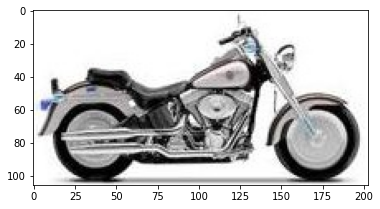

In [ ]:
# Sample picture 
import cv2
import matplotlib.pyplot as plt
img=cv2.imread(orginal_data_dir+'/motorbike/motorbike_0006.jpg')
plt.imshow(img)
print(type(img))

In [5]:
labels = os.listdir('/content/drive/My Drive/natural_images')
print(labels)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']



 AIRPLANE


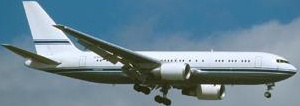

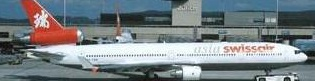

there are  727  images in  airplane class

 CAR


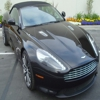

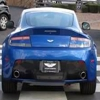

there are  968  images in  car class

 CAT


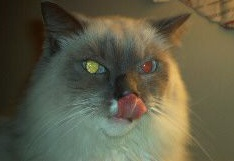

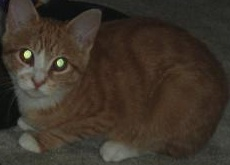

there are  885  images in  cat class

 DOG


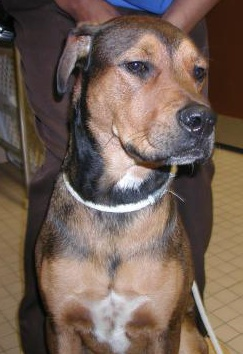

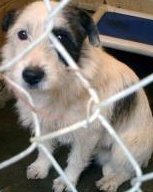

there are  702  images in  dog class

 FLOWER


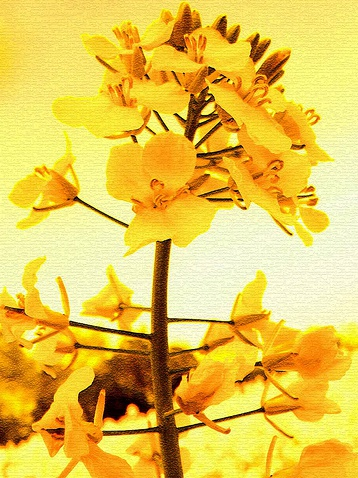

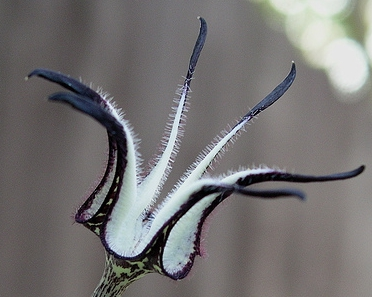

there are  843  images in  flower class

 FRUIT


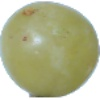

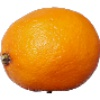

there are  1000  images in  fruit class

 MOTORBIKE


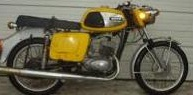

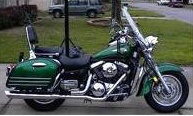

there are  788  images in  motorbike class

 PERSON


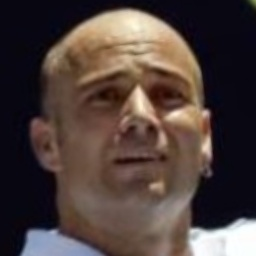

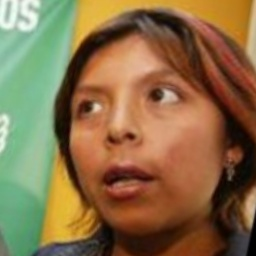

there are  986  images in  person class


In [6]:
from IPython.display import Image, display
num = []
for label in labels:
    path = '/content/drive/My Drive/natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    k = 0
    print('\n', label.upper())
    for image_path in folder_data:
        if k < 2:
            display(Image(path+image_path))
        k = k+1
    num.append(k)
    print('there are ', k,' images in ', label, 'class')

In [7]:
print(labels)
print(num)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']
[727, 968, 885, 702, 843, 1000, 788, 986]


**Creating Graph Visualisations to see the data**

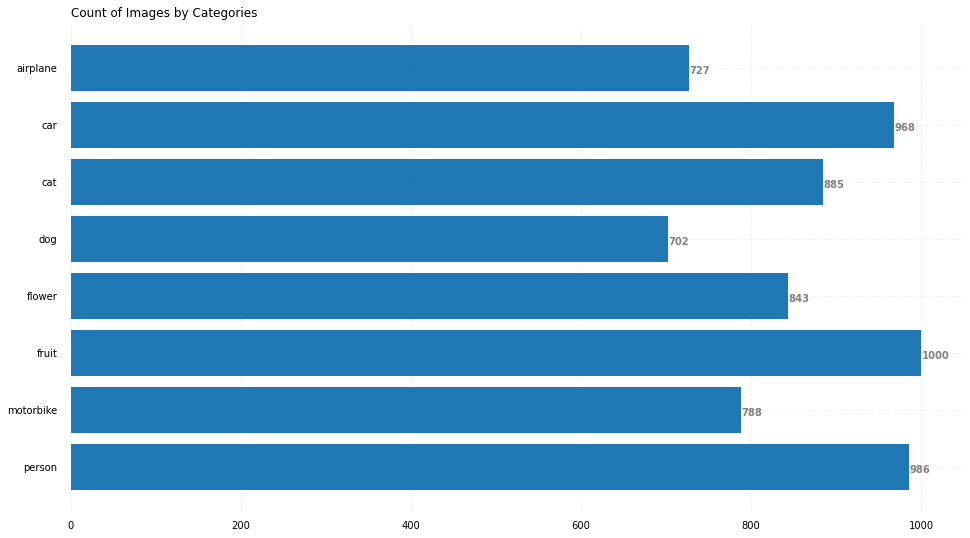

In [8]:
import pandas as pd 
from matplotlib import pyplot as plt 

# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 
  
# Horizontal Bar Plot 
ax.barh(labels, num) 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
  
# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
  
# Show top values  
ax.invert_yaxis() 
  
# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
  
# Add Plot Title 
ax.set_title('Count of Images by Categories', 
             loc ='left', )
  
# Show Plot 
plt.show() 

**Creating the subfolders for train test and validate dataset**

In [ ]:
#Creating test,train,crossvalidationdirctories to store the images 
train_dir = os.path.join(basedir,'train')
os.mkdir(train_dir)

validation_dir = os.path.join(basedir,'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(basedir,'test')
os.mkdir(test_dir)

In [ ]:
train_dir

'/content/natural_images_all/train'

**Creating subfolders for each class in each dir**

In [ ]:
def makesubfolders(folderPath , name):
    x = os.path.join(folderPath,name)
    os.mkdir(x)
    return x

In [ ]:
# Creating subfolders for training classes 
train_cats_dir =makesubfolders(train_dir,'cats')

train_dogs_dir=makesubfolders(train_dir,'dogs')

train_fruits_dir=makesubfolders(train_dir,'fruits')

train_persons_dir=makesubfolders(train_dir,'persons')

train_motorbikes_dir=makesubfolders(train_dir,'motorbikes')

train_airplanes_dir=makesubfolders(train_dir,'airplanes')

train_cars_dir=makesubfolders(train_dir,'cars')

train_flowers_dir=makesubfolders(train_dir,'flowers')


# Doing the same for crossvalidation data 
validation_cats_dir =makesubfolders(validation_dir,'cats')

validation_dogs_dir=makesubfolders(validation_dir,'dogs')

validation_fruits_dir=makesubfolders(validation_dir,'fruits')

validation_persons_dir=makesubfolders(validation_dir,'persons')

validation_motorbikes_dir=makesubfolders(validation_dir,'motorbikes')

validation_airplanes_dir=makesubfolders(validation_dir,'airplanes')

validation_cars_dir=makesubfolders(validation_dir,'cars')

validation_flowers_dir=makesubfolders(validation_dir,'flowers')


# Doing the same for test data 
test_cats_dir =makesubfolders(test_dir,'cats')

test_dogs_dir=makesubfolders(test_dir,'dogs')

test_fruits_dir=makesubfolders(test_dir,'fruits')

test_persons_dir=makesubfolders(test_dir,'persons')

test_motorbikes_dir=makesubfolders(test_dir,'motorbikes')

test_airplanes_dir=makesubfolders(test_dir,'airplanes')

test_cars_dir=makesubfolders(test_dir,'cars')

test_flowers_dir=makesubfolders(test_dir,'flowers')


In [ ]:
print(len(os.listdir(test_dir)))
print(len(os.listdir(train_dir)))

8
8


**Splitting the data into three sets 64% for training set, 16% for validation set and 20% for test set**

In [ ]:
def Copyfiles(folderName,z,dstName):
    list_imgs = os.listdir(orginal_data_dir+folderName)
   
    train_len = int(.64*len(list_imgs))
    test_len = int(.2*len(list_imgs))+train_len
    validation_len = int(.16*len(list_imgs))+test_len
    
    
    train_fnames = [list_imgs[i] for i in range (train_len)]
    for i in train_fnames: 
        y = z+i
        src = os.path.join(orginal_data_dir , y)
        t = os.path.join(train_dir,dstName)
        dst = os.path.join(t,i)
        shutil.copyfile(src,dst)

    test_fnames = [list_imgs[i] for i in range (train_len,test_len)]
    for i in test_fnames:
        y = z+i
        src = os.path.join(orginal_data_dir , y)
        test = os.path.join(test_dir,dstName)
        dst = os.path.join(test,i)
        shutil.copyfile(src,dst)
        
    validation_fnames=[list_imgs[i] for i in range(test_len,validation_len)]
    for i in validation_fnames: 
        y = z+i
        src = os.path.join(orginal_data_dir , y)
        validation = os.path.join(validation_dir,dstName)
        dst = os.path.join(validation,i)
        shutil.copyfile(src,dst)
    
    

**Copying the data into their folders**

In [ ]:
# Copying the cats into train,test,validaiton folder 
Copyfiles('/cat','cat/','cats')
Copyfiles('/dog','dog/','dogs')
Copyfiles('/car','car/','cars')
Copyfiles('/airplane','airplane/','airplanes')
Copyfiles('/flower','flower/','flowers')
Copyfiles('/motorbike','motorbike/','motorbikes')
Copyfiles('/fruit','fruit/','fruits')
Copyfiles('/person','person/','persons')
print('successfully copied to destination folders ')

successfully copied to destination folders 


**Keras_ImageDataGenerator:**

The function of Keras Image Data Generator

Reads the picture files, 
Decodes the JPEG pictures to RGB pictures, 
Converts the images into floating point tensors, 
Rescales the images from 255 to 0 to 1 because the neurons gets saturated if they have high input values

In [ ]:
from keras.preprocessing.image import ImageDataGenerator 
train_datagen = ImageDataGenerator(rescale = 1/255)
# Rescales the image every pixel to 0 to 1 

train_generator=train_datagen.flow_from_directory(
    train_dir,# the train data directory path where 8 label images present in different directories 
    target_size=(150,150),#resizing every image by 150 X 150 size so all the images will be of the same size and shape 
    batch_size = 20 ,# 20 images will be grouped together and soteres as single object and it will be returned at one iteration 
    class_mode ='categorical'# because we have 8 to classes we need to go with bianaty it labels the data based on the directories 

)#this method loads the data from the directory and iterates over all the files 

validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator=validation_datagen.flow_from_directory(
    validation_dir,# the train data directory path where 8 label images present in different directories 
    target_size=(150,150),#resizing every image by 150 X 150 size so all the images will be of the same size and shape 
    batch_size = 20 ,# 20 images will be grouped together and soteres as single object and it will be returned at one iteration 
    class_mode ='categorical'# because we have only to classes we need to go with bianaty it labels the data based on the directories 

)

Found 4419 images belonging to 8 classes.
Found 1102 images belonging to 8 classes.


In [ ]:
for data_batch,label_batch in validation_generator:
    print("The shape of the 1st data batch is " ,data_batch.shape)
    print("The shape of the 1st label batch is " ,label_batch.shape)
    break

The shape of the 1st data batch is  (20, 150, 150, 3)
The shape of the 1st label batch is  (20, 8)


We can see above each image is stored as 150 X 150 X 3 shape

**Below is the sample of first image**

[1. 0. 0. 0. 0. 0. 0. 0.]


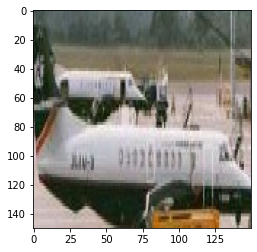

In [ ]:
for data_batch,label_batch in train_generator:
    print(label_batch[0])
    plt.imshow(data_batch[0])
   
    break

**Building a Model**

In [ ]:
from keras import layers 
from keras import models 
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape =(150,150,3)))
# here we are defining a conv layer with the basic config after this layer will get a image with the depth of 32 and 148 x 148 because we are not doing pooling 
model.add(layers.MaxPooling2D((2,2)))
# Here again applied a Maxpooling layer of the 2 x 2 here zero parameter will be trained 
model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
# above is the second conv layer 
model.add(layers.MaxPooling2D((2,2)))
# Again Maxpooling layer 
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation = 'relu'))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation='relu'))

model.add(layers.Dense(8,activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
from keras import optimizers 
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['accuracy'])

In [ ]:

history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 114s 1s/step - loss: 1.5064 - accuracy: 0.4707 - val_loss: 0.9722 - val_accuracy: 0.6750
Epoch 2/30
100/100 [==============================] - 113s 1s/step - loss: 0.8286 - accuracy: 0.7075 - val_loss: 0.9405 - val_accuracy: 0.6640
Epoch 3/30
100/100 [==============================] - 114s 1s/step - loss: 0.6577 - accuracy: 0.7605 - val_loss: 0.6571 - val_accuracy: 0.7570
Epoch 4/30
100/100 [==============================] - 112s 1s/step - loss: 0.5777 - accuracy: 0.7904 - val_loss: 0.4631 - val_accuracy: 0.8250
Epoch 5/30
100/100 [==============================] - 112s 1s/step - loss: 0.4965 - accuracy: 0.8140 - val_loss: 0.6838 - val_accuracy: 0.7670
Epoch 6/30
100/100 [==============================] - 114s 1s/step - loss: 0.4677 - accuracy: 0.8299 - val_loss: 0.3683 - val_accuracy: 0.8700
Epoch 7/30
100/100 [==============================] - 114s 1s/step

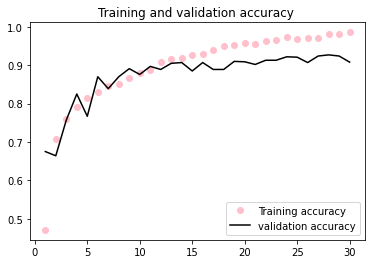

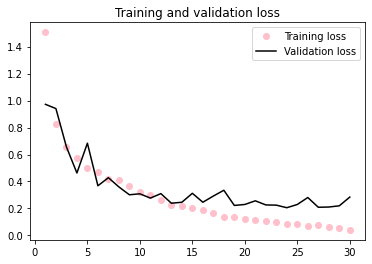

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
# returns the training accuracies while training 
val_acc = history.history['val_accuracy']
# returns the validation accuracy at different levels 
loss = history.history['loss']
# returns the loss at different levels over training data 
val_loss = history.history['val_loss']
#returns the validation loss through put the process 
epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training accuracy',color='pink')
plt.plot(epochs,val_acc,'b',label='validation accuracy',color='black')
plt.title('Training and validation accuracy ')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss',color='pink')
plt.plot(epochs,val_loss,'b',label='Validation loss',color='black')
plt.title('Training and validation loss')
plt.legend()

plt.show()

From the above model we have got an accuracy of about 98% to 99% on the training data but very low i.e.. max of 90 % on the validation data because the model is overfitting the training images

In [ ]:
os.chdir(basedir)
os.mkdir(os.getcwd()+'/model')
os.chdir(os.getcwd()+'/model')
model.save('model1')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model1/assets


**Evaluating the Model On Test data**

In [ ]:
test_datagen = ImageDataGenerator(rescale=1/255)

test_generator=validation_datagen.flow_from_directory(
    test_dir,# the train data directory path where 8 label images present in different directories 
    target_size=(150,150),#resizing every image by 150 X 150 size so all the images will be of the same size and shape 
    batch_size = 20 ,# 20 images will be grouped together and soteres as single object and it will be returned at one iteration 
    class_mode ='categorical'# because we have only to classes we need to go with bianaty it labels the data based on the directories 

)

Found 1379 images belonging to 8 classes.


In [ ]:
model.evaluate_generator(test_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.3628562092781067, 0.9034132361412048]

On test data our naive model is predicting with an acccuracy of 90 % we will add regularization techniques and some data augmentaion techniques so our model will be improved

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Class predicted by model  [6]
The image belongs to  [0. 0. 0. 0. 0. 0. 1. 0.]


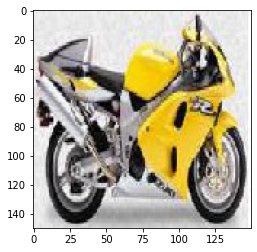

In [ ]:
x =0 
for i,j in test_generator:
   
        print('Class predicted by model ',model.predict_classes(i[19].reshape((1,)+i[19].shape)))
        print('The image belongs to ',j[19])
        plt.imshow(i[19])
        break

In [11]:
print(labels)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


The image belongs to 7th category Motorbike which the model has predicted correctly.

The order of the dataset is
0-airplane
1-car
2-cat
3-dog
4-flower
5-fruit 
6-motorbike
7-person

From above results we can observe that our model is overfitting the data so we need to reduce this effect and make the model work well on both cross validation data and test data as well.This happens manily because of two reasons the model is too complex so it is not generalising well and training data is small so it does't have much information to learn the features that it encounter in the feature .So now we will perform  data augmentation to generate more data from the current data by modifying the current data .

**Applying Data Augmentaion and Regularization**

In [ ]:
datagen = ImageDataGenerator(rotation_range = 60,  # how much rotaion of the image need to be done between (0-180)
                             width_shift_range = 0.2, # how much width the image can be shifted of the total size of the image 
                             height_shift_range = 0.2, # similar with height 
                             shear_range = .2,
                             zoom_range = .2 ,# how much can an image can be zoomed 
                             fill_mode = 'nearest' # after moving image there may be few empty pixels so we are making them to fill by nearest pixels 
                                           
                            )

Displaying some randomly generated images

As we can see from the below representation, images are moved up and down in this way the augmentaion will generate hundereds of new images to train

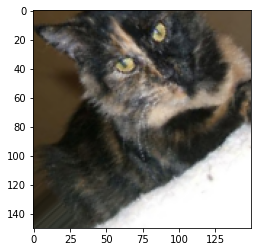

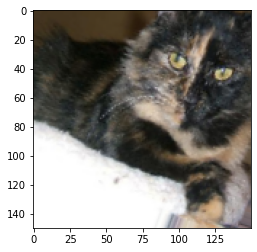

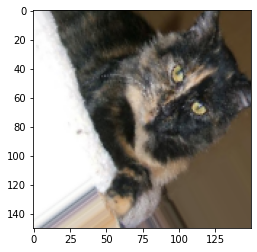

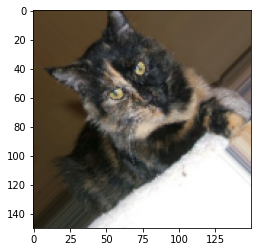

In [ ]:
from keras.preprocessing import image 
fname = os.path.join(train_cats_dir,os.listdir(train_cats_dir)[78])
img = image.load_img(fname , target_size=(150,150))
x = image.img_to_array(img) #Converts image into array 
x = x.reshape((1,)+x.shape)
i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i = i+1
    if i%4 == 0 :
        break
plt.show()

**Defining a new network to train with the Augmented data**

In [ ]:
#Building a simple network 
from keras import layers 
from keras import models 
model1 = models.Sequential()
model1.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape =(150,150,3)))
# here we are defining a conv layer with the basic config after this layer will get a image with the depth of 32 and 148 x 148 because we are not doing pooling 
model1.add(layers.MaxPooling2D((2,2)))
# Here again applied a Maxpooling layer of the 2 x 2 here zero parameter will be trained 
model1.add(layers.Conv2D(64,(3,3),activation = 'relu'))
# above is the second conv layer 
model1.add(layers.MaxPooling2D((2,2)))
# Again Maxpooling layer 
model1.add(layers.Conv2D(128,(3,3),activation = 'relu'))

model1.add(layers.MaxPooling2D((2,2)))

model1.add(layers.Conv2D(128,(3,3),activation = 'relu'))

model1.add(layers.MaxPooling2D((2,2)))

model1.add(layers.Flatten())

model1.add(layers.Dropout(.5)) # Addding extra droup out layer that retains every neuron with the probability of .5

model1.add(layers.Dense(512,activation='relu'))

model1.add(layers.Dense(8,activation = 'softmax'))

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

We have to train a total of 3M + parameters

In [ ]:
model1.compile(loss = 'categorical_crossentropy',optimizer = optimizers.RMSprop(lr = 1e-4),metrics = ['accuracy'])

**Loading data to train the model**

In [ ]:
train_datagen1 = ImageDataGenerator(rescale=1/250,rotation_range = 40,  # how much rotaion of the imgage need to be done between (0-180)
                             width_shift_range = 0.2, # how much width the image can be shifted of the total size of the image 
                             height_shift_range = 0.2, # similar with height 
                             shear_range = .2,
                             zoom_range = .2 ,# how much can an image can be zoomed 
                             fill_mode = 'nearest', # after moving image there may be few empty pixels so we are making them to fill by nearest pixels 
                            horizontal_flip = True
                            )

validation_datagen1 = ImageDataGenerator(rescale = 1/255)# we don't need to do dataaugmentation on the validation and the training data 

test_datagen1 = ImageDataGenerator(rescale = 1/255)

train_generator1 = train_datagen1.flow_from_directory(
    train_dir,# the train data directory path where 8 label images present in different directories 
    target_size=(150,150),#resizing every image by 150 X 150 size so all the images will be of the same size and shape 
    batch_size = 20 ,# 20 images will be grouped together and soteres as single object and it will be returned at one iteration 
    class_mode ='categorical'# because we have 8 to classes we need to go with bianaty it labels the data based on the directories 

)#this method loads the data from the directory and iterates over all the files 

validation_generator1 = validation_datagen1.flow_from_directory(
    validation_dir,# the train data directory path where 8 label images present in different directories 
    target_size=(150,150),#resizing every image by 150 X 150 size so all the images will be of the same size and shape 
    batch_size = 20 ,# 20 images will be grouped together and soteres as single object and it will be returned at one iteration 
    class_mode ='categorical'# because we have 8 to classes we need to go with bianaty it labels the data based on the directories 

)#this method loads the data from the directory and iterates over all the files 

test_generator1 = train_datagen1.flow_from_directory(
    test_dir,# the train data directory path where 8 label images present in different directories 
    target_size=(150,150),#resizing every image by 150 X 150 size so all the images will be of the same size and shape 
    batch_size = 20 ,# 20 images will be grouped together and soteres as single object and it will be returned at one iteration 
    class_mode ='categorical'# because we have 8 to classes we need to go with bianaty it labels the data based on the directories 

)#this method loads the data from the directory and iterates over all the files

Found 4419 images belonging to 8 classes.
Found 1102 images belonging to 8 classes.
Found 1379 images belonging to 8 classes.


In [ ]:
history1 = model1.fit_generator(train_generator1,
                                steps_per_epoch =100,
                                epochs = 50,
                                validation_data = validation_generator1,
                                validation_steps = 50)

Epoch 1/50
100/100 [==============================] - 118s 1s/step - loss: 1.7792 - accuracy: 0.3290 - val_loss: 1.2079 - val_accuracy: 0.6090
Epoch 2/50
100/100 [==============================] - 118s 1s/step - loss: 1.3446 - accuracy: 0.5130 - val_loss: 1.1765 - val_accuracy: 0.5410
Epoch 3/50
100/100 [==============================] - 117s 1s/step - loss: 1.1722 - accuracy: 0.5755 - val_loss: 1.1278 - val_accuracy: 0.5920
Epoch 4/50
100/100 [==============================] - 116s 1s/step - loss: 1.1127 - accuracy: 0.6033 - val_loss: 1.2217 - val_accuracy: 0.5590
Epoch 5/50
100/100 [==============================] - 115s 1s/step - loss: 0.9946 - accuracy: 0.6290 - val_loss: 0.8444 - val_accuracy: 0.6990
Epoch 6/50
100/100 [==============================] - 117s 1s/step - loss: 0.9459 - accuracy: 0.6480 - val_loss: 0.6154 - val_accuracy: 0.7750
Epoch 7/50
100/100 [==============================] - 118s 1s/step - loss: 0.8872 - accuracy: 0.6710 - val_loss: 0.7831 - val_accuracy: 0.7090

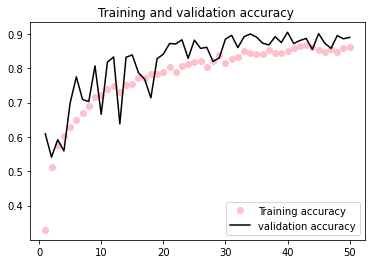

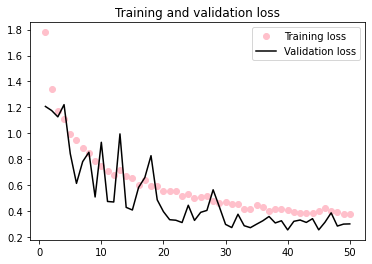

In [ ]:
import matplotlib.pyplot as plt

acc = history1.history['accuracy']
# returns the training accuracies while training 
val_acc = history1.history['val_accuracy']
# returns the validation accuracy at different levels 
loss = history1.history['loss']
# returns the loss at different levels over training data 
val_loss = history1.history['val_loss']
#returns the validation loss through put the process 
epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training accuracy',color='pink')
plt.plot(epochs,val_acc,'b',label='validation accuracy',color='black')
plt.title('Training and validation accuracy ')
plt.legend()
plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss',color='pink')
plt.plot(epochs,val_loss,'b',label='Validation loss',color='black')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model1.evaluate_generator(test_generator1)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.35640379786491394, 0.8687454462051392]

After evaluating the model on test set we got an accuracy of 86% and the model is doing well classifiying the image

Class predicted by model  [7]
The image belongs to  [0. 0. 0. 0. 0. 0. 0. 1.]


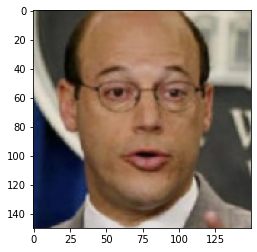

In [ ]:
x =0 
for i,j in test_generator:
   
        print('Class predicted by model ',model1.predict_classes(i[19].reshape((1,)+i[19].shape)))
        print('The image belongs to ',j[19])
        plt.imshow(i[19])
        break

The image belongs to 8th Category Person which the model has predicted correctly.



In [10]:
print(labels)


['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


By the above prediction we can conclude that out model is classifying images with a good accuracy. Since the dataset contains 6899 images and with a huge dataset this model will learn better and predict results with more accuracy